# Unit 02: Computing with Data in Python

# Outline of Unit 02

- **02: Computing with Data in Python**
  - Vector
      - Vectors: assigning, accessing, visualizing
      - Vector addition, subtraction, scaling, linear combination
      - Inner products, affine function, norm, distance, angle
  - Matrix
      - Matrices, special matrices
      - Matrix transpose, addition, subtraction, scaling
      - Matrix-vector multiplication, Matrix-matrix multiplication

# 1. What is a Matrix

<center><img src="figs/06_matrix_everywhere.gif" alt="default", width=1000px/></center>

## Definition of a Matrix

$\color{#EF5645}{\text{Definition}}$: A _matrix_ is a rectangular array of numbers, e.g.:
$$A =\begin{vmatrix}
0   & 1  & -2.3  \\
1.3 & 4  & -0.1 
\end{vmatrix}$$

- Its _size_ or _shape_ is: (number of rows) x (number of columns).
- Its elements are called: _entries, coefficients_.
- $A_{i, j}$ refers to element at ith row and jth column.
  - i is the _row index_ and j is the _column index_.
  
$\color{#EF5645}{\text{Remark:}}$ We often denote a matrix with a capital letter such as A and vectors with a lower case letter such as a.

### Examples in ECE and beyond


- Weather: $A_{ij}$ is rainfall data at location $i$ on day $j$.
- Finances: $A_{ij}$ is the return of asset $i$ in period $j$.
- Images: $A_{ij}$ is intensity value at $i, j$.

$\color{#003660}{\text{In Python}}$, we use `numpy` and `np.array` to build matrices. We compute its shape with `shape`.

In [128]:
import numpy as np


A = np.array([
    [0, 1, -2.3], 
    [1.3, 4, -0.1]
])
print(A)
print(np.shape(A))
print(A.size)

[[ 0.   1.  -2.3]
 [ 1.3  4.  -0.1]]
(2, 3)
6


$\color{#003660}{\text{In Python}}$, we can access the elements of the matrix.

In [129]:
A = np.array([
    [0, 1, -2.3], 
    [1.3, 4, -0.1]
])

print(A[0, 0])
print(A[0, 2])

0.0
-2.3


## Sizes/Shapes of Matrices

$\color{#EF5645}{\text{Definitions}}$: A $n \times m$ matrix $A$ is:
- _tall_ if n > m (more rows than columns)
- _wide_ if n < m (more columns than rows)
- _square_ if n = m (same columns as rows)

$\color{#EF5645}{\text{Special cases}}$:
- A 1 x 1 matrix is a number or scalar.
- A n x 1 matrix is an $n$-vector.
- A 1 x m matrix is a $m$-row-vector. 

Starting now, we will distinguish vectors and row vectors.

## Column representation of a matrix

An $n \times m$ matrix $A$ can be repersented an ordered collection of m n-vectors $a_1, ..., a_n$:
  $$A = [a_1 ... a_n]$$
The jth column of $A$ is the $n$-vector:
$$a_j = \begin{vmatrix}
A_{1j} \\
\vdots \\
A_{nj}
\end{vmatrix}$$

## Row representation of a matrix
An $n \times m$ matrix $A$ can be repersented an ordered collection of n m-row-vectors $b_1, ..., b_n$:
  $$A = \begin{vmatrix}
  b_1 \\
  \vdots \\
  b_m
  \end{vmatrix}$$
The ith row is the $m$-row-vector: 
$$[A_{i1}, ..., A_{im}]$$

## Slices of a matrix

$\color{#EF5645}{\text{Definition}}$ The slice of matrix $A_{p:q, r:s}$ is the matrix:
$$\begin{vmatrix}
A_{pr} & A_{p, r+1} & ... & A_{ps}  \\
... & ... & ... & ... \\
A_{qr} & A_{q, r+1} & ... & A_{qs}
\end{vmatrix}.$$

$\color{#003660}{\text{In Python}}$, we can extract rows, columns and slices:

In [130]:
A = np.array([
    [1.1, 2.2, 3.3], 
    [4.4, 5.5, 6.6], 
    [7.7, 8.8, 9.9]]) 
print("Matrix:")
print(A)

print("Columns:")
print(A[:,0]); print(A[:,1]); print(A[:,2])

print("Rows:")
print(A[0, :]); print(A[1,:]); print(A[2,:])

print("Matrix Slice:")
A[0:2, 1:3]

Matrix:
[[1.1 2.2 3.3]
 [4.4 5.5 6.6]
 [7.7 8.8 9.9]]
Columns:
[1.1 4.4 7.7]
[2.2 5.5 8.8]
[3.3 6.6 9.9]
Rows:
[1.1 2.2 3.3]
[4.4 5.5 6.6]
[7.7 8.8 9.9]
Matrix Slice:


array([[2.2, 3.3],
       [5.5, 6.6]])

## Special Matrices

### Zero Matrix

$\color{#EF5645}{\text{Definition}}$: The $n \times m$ matrix with all entries 0 is denoted $0_{n \times m}$ or just $0$ and is called a _zero matrix_. 

### Ones Matrix

$\color{#EF5645}{\text{Definition}}$: $n \times m$ matrix with all entries 1 is denoted $1_{n \times m}$ or just $1$ and is called a _ones matrix_.

### Identity Matrix

$\color{#EF5645}{\text{Definition}}$: The $n \times n$ matrix with all entries 0 except the diagonal elements are 1 is denoted $I_n$ or just $I$ is the _identity matrix_.

$\color{#003660}{\text{In Python}}$, we use `zeros` , `ones`, and `identity` or `eye` (from `numpy`) to build these vectors.

In [133]:
n, m = 3, 4

zero = np.zeros((n,m))
print(zero)

ones = np.ones((n,m))
print(ones)

I = np.eye(n)
I = np.identity(n)
print(I)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


$\color{#047C91}{\text{Exercise}}$: How many elements of an $n$ identity matrix are zero?

In [135]:
n = 1200
I = np.eye(n)
num_zero = np.sum(I == 0)

print(num_zero)
print(n * (n - 1))

1438800
1438800


# Operations on Matrices

## Operations that directly follow from vector operations

### Matrix Addition and Subtraction

$\color{#EF5645}{\text{Definition}}$: Two $n \times m$ matrices A and B can be added or subtracted to give a new $n \times m$ matrix:
$$(A + B)_{ij} = A_{ij} + B_{ij}.$$

### Scalar-Matrix multiplication

$\color{#EF5645}{\text{Definition}}$: A scalar β and an $n \times m$ matrix a can be multiplied to give a new $n \times m$ matrix: 
$$(βA)_{ij} = \beta A_{ij}.$$

### Elementwise-multiplication (Hadamard Product)

$\color{#EF5645}{\text{Definition}}$: Two $n \times m$ matrices $A$ amd $B$ can be multiplied to give a new $n \times m$ matrix: 
$$(A \odot B)_{ij} = A_{ij}B_{ij}.$$

## Frobenius Norm

$\color{#EF5645}{\text{Definition}}$: For a $n \times m$ matrix $A$, we define the _matrix norm_ as:

<center>
$||A|| = \sqrt{\sum_{i=1}^n \sum_{j=1}^m A_{ij}^2}.$</center>

$\color{#EF5645}{\text{Remark}}$: This definition agrees with the definition of norm of vectors when $n=1$ or $m=1$.

$\color{#047C91}{\text{Exercise}}$: Compute the matrix norm of $A = \begin{vmatrix}
1 & 0 & -1\\
0 & 1 & 1 \end{vmatrix}.$

$\color{#003660}{\text{In Python}}$, we use `np.linalg.norm`.

In [27]:
import numpy as np

A = np.array([
    [1, 0, -1],
    [0, 1, 1]
])
print(np.linalg.norm(A))

2.0


$\color{#047C91}{\text{Exercise}}$: Can you write a function that determines the Frobenius norm of a matrix $A$ in terms of the Eulciden norm of its column vectors $a_1, \dots, a_m$?

In [136]:
def frobenius_norm(A):
    n, m = np.shape(A)
    norm = 0
    for j in range(m):
        a = A[:,j]
        norm += np.dot(a,a)
    return np.sqrt(norm)


A = np.array([
    [1, 0, -1],
    [0, 1, 1]
])
print(frobenius_norm(A))

2.0


## Transpose

$\color{#EF5645}{\text{Definition}}$: The _transpose of an $n \times m$ matrix_ $A$ is a $m \times n$ matrix, written $A^T$, and is defined by:
$$ (A^T)_{ij} = A_{ji}, \quad i = 1,...,m \quad j=1,...,n$$

$\color{#047C91}{\text{Example}}$: $\begin{vmatrix}
0.2 & 1.2 & 10 \\
0 & -3 & 0
\end{vmatrix}^T = \begin{vmatrix}
0.2 & 0 \\
1.2 & -3 \\
10 & 0
\end{vmatrix}$


$\color{#6D7D33}{\text{Property}}$: The transpose verifies:
- $(A^T)^T = A$
- $(A + B)^T = A^T + B^T$

_Hint:_ $\color{#003660}{\text{In Python}}$, we use `imshow` to plot an image.

[[ 1  0 -1]
 [ 0  1  0]]
[[ 1  0]
 [ 0  1]
 [-1  0]]


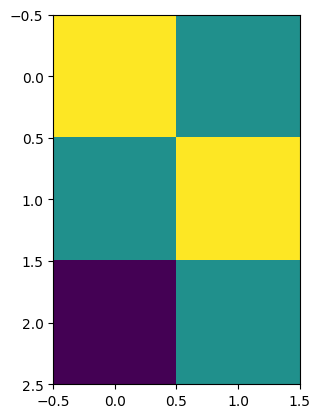

In [6]:
A = np.array([
    [1, 0, -1],
    [0, 1, 0]])

print(A)
print(A.T)
plt.imshow(A)
plt.imshow(A.T)

## Matrix-Vector Multiplication

$\color{#EF5645}{\text{Definition}}$: If $A$ is an $n \times m$ matrix and $x$ is an $m$-vector, then the _matrix-vector_ product $y = Ax$ is the $n$-vector with elements: 
$$y_i = \sum_{j = 1}^m A_{ij}x_j$$

$\color{#047C91}{\text{Example}}$: 

$$\begin{vmatrix}
0 & 2 & -1 \\
-2 & 1 & 1
\end{vmatrix} 
\begin{vmatrix}
2 \\
1 \\
-1
\end{vmatrix} = 
\begin{vmatrix}
3 \\
-4
\end{vmatrix}$$

In [143]:
A = np.array([
    [0, 2, -1],
    [-2, 1, 1]])
x = np.array([2, 1, -1])

y = A @ x
y = A.dot(x)

print(y)

[ 3 -4]


$\color{#047C91}{\text{Exercise}}$: Can you write a function that computes the matrix-vector product only using dot products?

In [144]:
def matrix_vector_dot(A, x):
    n, m = np.shape(A)
#     if m != np.size(x):
#         return False
    y = np.zeros(n)
    for i in range(n):
        a = A[i,:]
        y[i] = np.dot(a, x)
    return y

A = np.array([
    [0, 2, -1],
    [-2, 1, 1]])
x = np.array([2, 1, -1])
y = matrix_vector_dot(A, x)
print(y)

[ 3. -4.]


$\color{#047C91}{\text{Exercise}}$: Can you write a function that computes the matrix-vector product only using linear combinations?

In [145]:
def matrix_vector_linear_comb(A, x):
    n, m = np.shape(A)
    y = np.zeros(n)
    for j in range(m):
        a = A[:,j]
        y += x[j] * a
    return y

A = np.array([
    [0, 2, -1],
    [-2, 1, 1]])
x = np.array([2, 1, -1])
y = matrix_vector_linear_comb(A, x)
print(y)

[ 3. -4.]


$\color{#047C91}{\text{Exercise}}$: If $a$ and $b$ are $n$-vectors, what is the matrix vector product $a^Tb$?

In [3]:
a = np.array([[2, 1, -1, 4, 5, -9]]).T
b = np.array([[-1, 1, 4, 4, -1, 8]]).T
y = a.T @ b
print(y)

[[-66]]


## Matrix-Matrix Multiplication

$\color{#EF5645}{\text{Definition}}$: An $n \times m$ matrix $A$ and a $m \times k$ matrix $B$ be multiplied to give a new $n \times k$ matrix C: 
$$C = AB$$

where the jth column vector of $C$ is given by the matrix vector product $Ab_j$ where $b_j$ is the jth column vector of $B$.

In [6]:
# TODO: Write an example of A B matrix multiplication.
# A = ..
# B = 
# C = 

[[ -2   2   8   8  -2  16]
 [ -1   1   4   4  -1   8]
 [  1  -1  -4  -4   1  -8]
 [ -4   4  16  16  -4  32]
 [ -5   5  20  20  -5  40]
 [  9  -9 -36 -36   9 -72]]


# Recap of Unit 02

- **02: Computing with Data in Python**
  - Vector
      - Vectors: assigning, accessing, visualizing
      - Vector addition, subtraction, scaling, linear combination
      - Inner products, affine function, norm, distance, angle
      - Orthogonality and linear independence
  - Matrix
      - Matrices, special matrices
      - Matrix transpose, addition, subtraction, scaling
      - Matrix-vector multiplication, Matrix-matrix multiplication

# Next week with David!

The course ECE 3 is organized into 4 units.

- Unit 01: Welcome to Python
- Unit 02: Computing with Data in Python
- **Unit 03: Summarizing Data in Python**
- Unit 04: Predicting from Data with Machine Learning in Python